In [1]:
import pickle

with open("result.pkl", "rb") as f:
  data = pickle.load(f)

In [7]:
from PIL import Image
import numpy as np
from IPython import display

img = Image.open("cv_sample.png")
img_shape = img.height, img.width

r, g, b = (0, 100, 0)
for i, bbox in enumerate(data):
  overlay = np.stack([
    np.full(img_shape, r) * bbox["segmentation"],
    np.full(img_shape, g) * bbox["segmentation"],
    np.full(img_shape, b) * bbox["segmentation"],
  ], axis=-1)  

  overlaid_img = Image.fromarray(np.minimum(np.array(img) + overlay, 255).astype(np.uint8))
  overlaid_img.save(f"cv_sample_masks/mask_{i}.png")
  # display.display(overlaid_img)

In [83]:
np.minimum(np.array(img) + overlay, 255)

(415, 1024, 3)

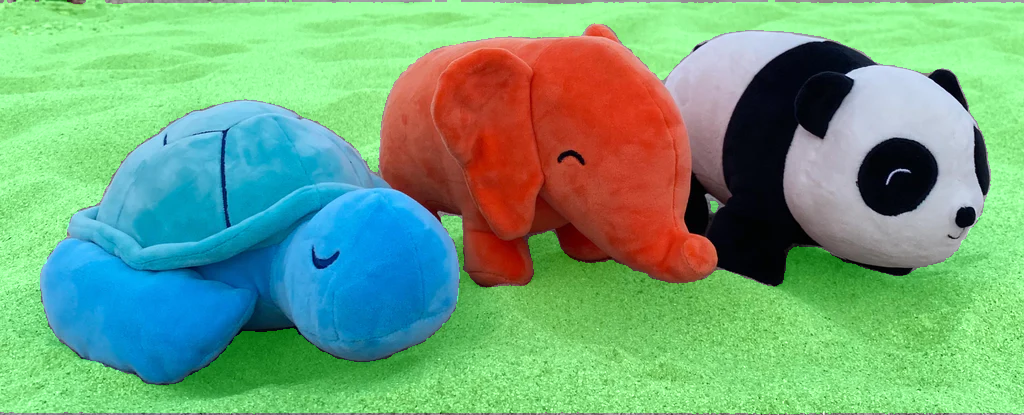

In [4]:
Image.fromarray(np.minimum(np.array(img) + overlay, 255).astype(np.uint8))